In [1]:
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format ='retina'

sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

#Load states shapefile (for plotting) (https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html under States)

statesShp = gpd.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(14, 7))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [2]:
df10 = pd.read_pickle(dataFolder + "combined2010.pkl")
df15 = pd.read_pickle(dataFolder + "combined2015.pkl")
df19 = pd.read_pickle(dataFolder + "combined2019.pkl")
df20 = pd.read_pickle(dataFolder + "combined2020.pkl")
df21 = pd.read_pickle(dataFolder + "combined2021.pkl")

In [3]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal

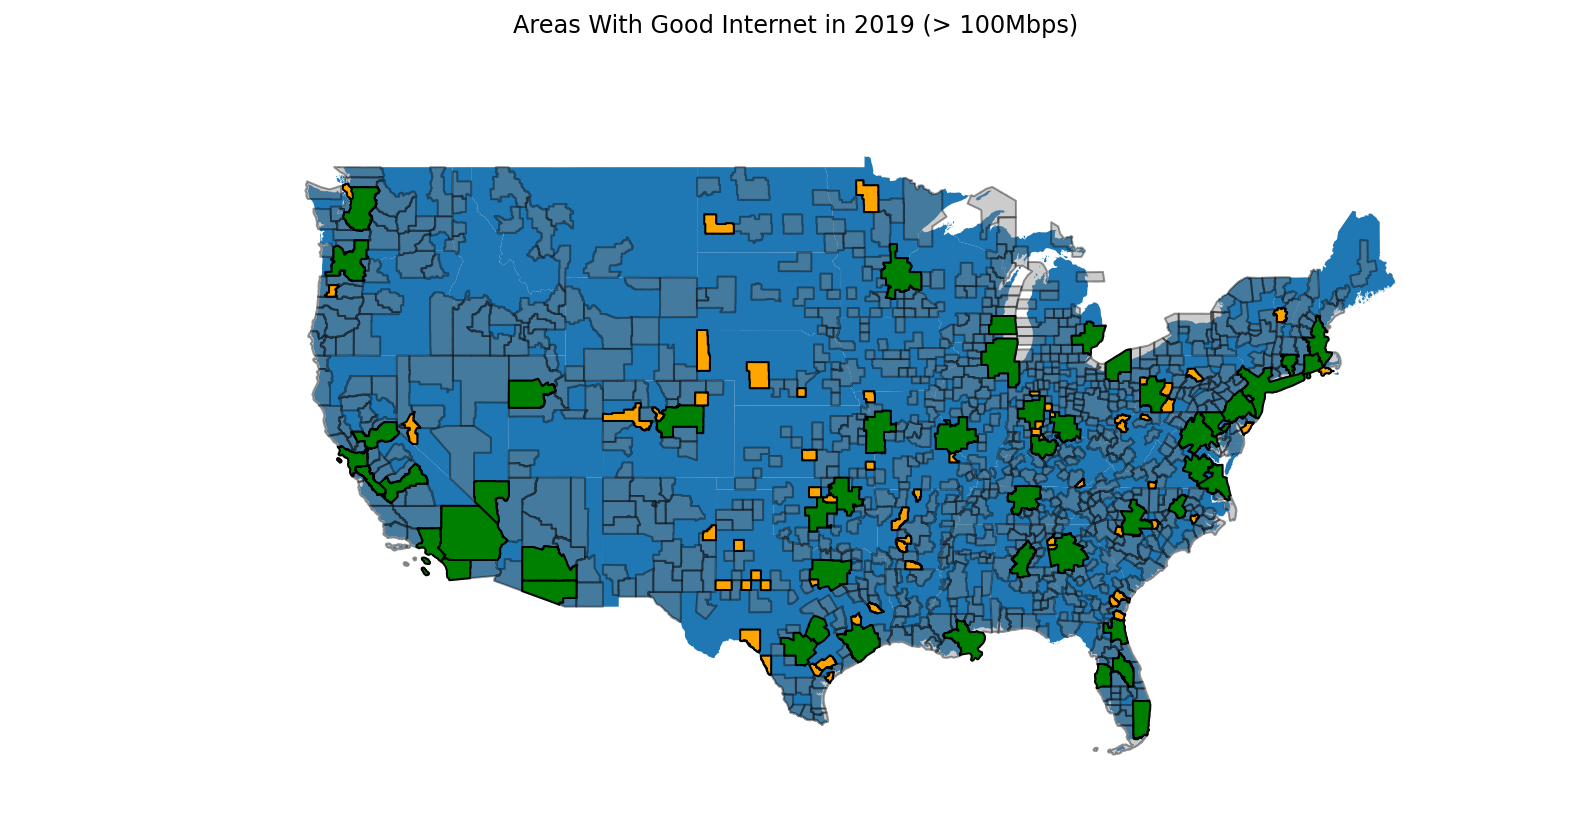

In [4]:
good = df19['avg_d_kbps'] > 100_000
ax = plotUS()
df21.plot(ax=ax, color="grey", edgecolor="black", linewidth=1, alpha=0.4)
df21[metro & good].plot(ax=ax, color="green", edgecolor="black", linewidth=1)
df21[micro & good].plot(ax=ax, color="orange", edgecolor="black", linewidth=1)
plt.axis('off')
plt.title("Areas With Good Internet in 2019 (> 100Mbps)");

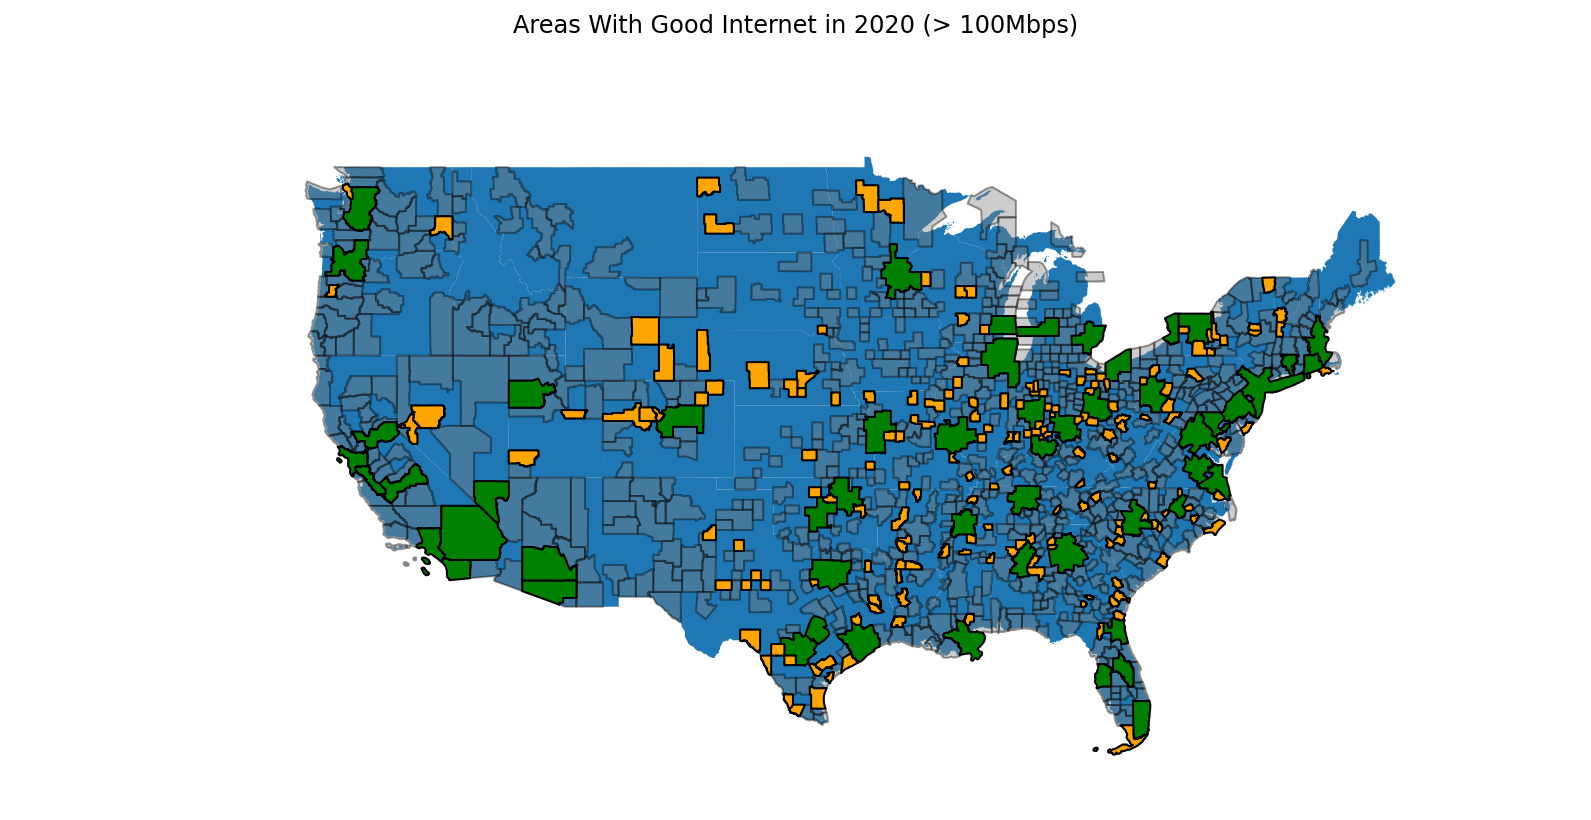

In [5]:
good = df20['avg_d_kbps'] > 100_000
ax = plotUS()
df21.plot(ax=ax, color="grey", edgecolor="black", linewidth=1, alpha=0.4)
df21[metro & good].plot(ax=ax, color="green", edgecolor="black", linewidth=1)
df21[micro & good].plot(ax=ax, color="orange", edgecolor="black", linewidth=1)
plt.axis('off')
plt.title("Areas With Good Internet in 2020 (> 100Mbps)");

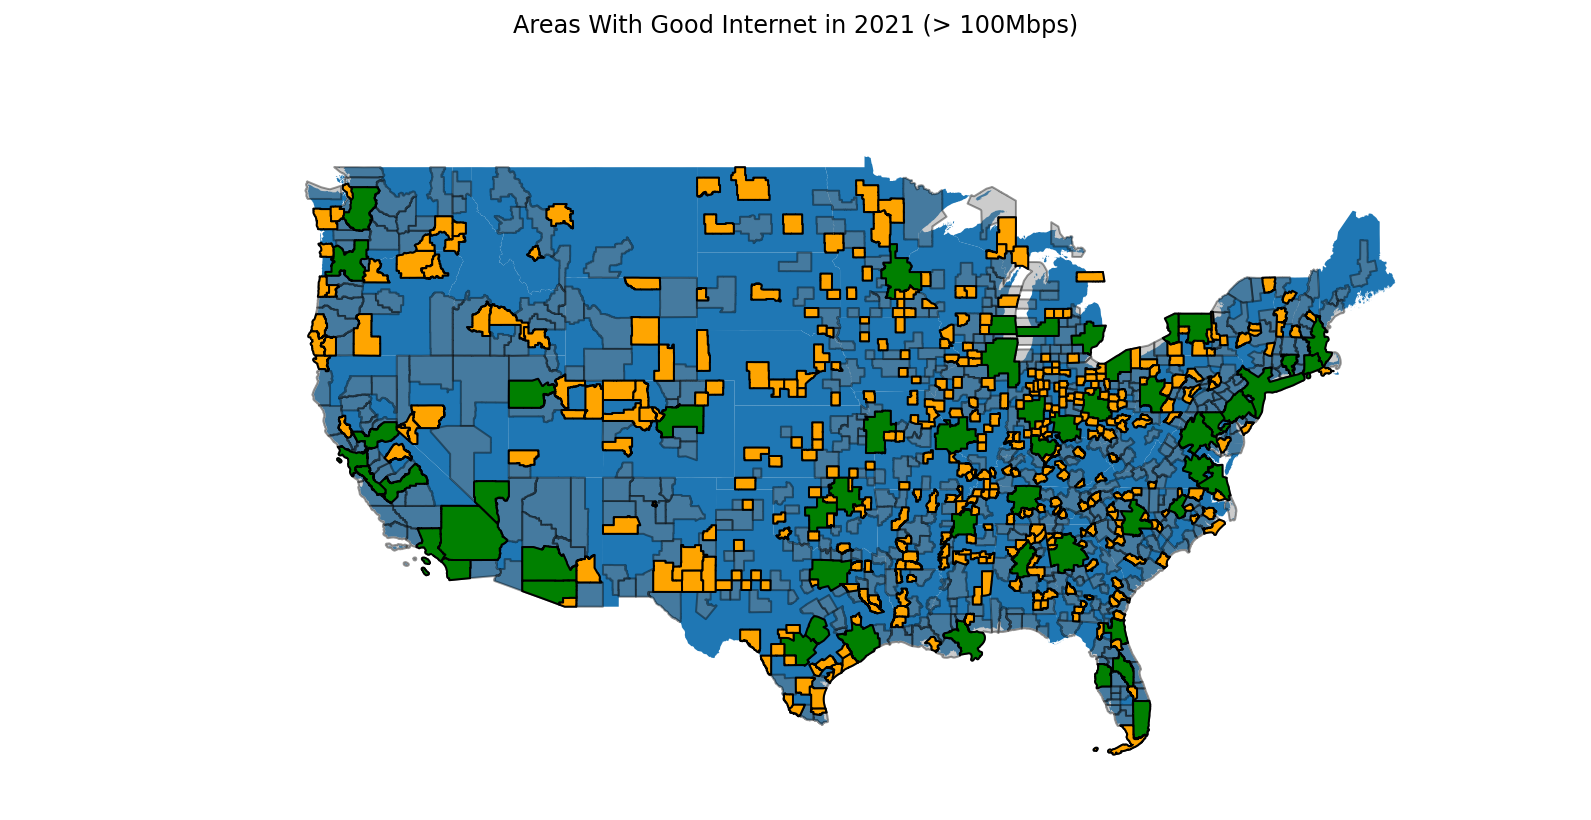

In [6]:
good = df21['avg_d_kbps'] > 100_000
ax = plotUS()
df21.plot(ax=ax, color="grey", edgecolor="black", linewidth=1, alpha=0.4)
df21[metro & good].plot(ax=ax, color="green", edgecolor="black", linewidth=1)
df21[micro & good].plot(ax=ax, color="orange", edgecolor="black", linewidth=1)
plt.axis('off')
plt.title("Areas With Good Internet in 2021 (> 100Mbps)");

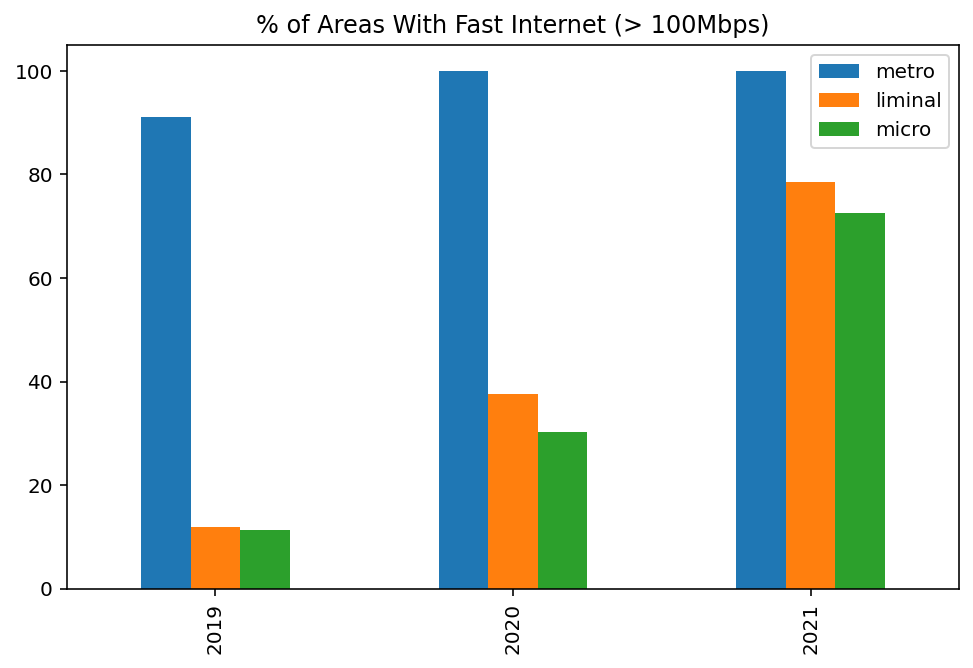

In [7]:
df = pd.DataFrame()
df.loc[2019, 'metro']   = (df19[metro]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2019, 'liminal'] = (df19[liminal]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2019, 'micro']   = (df19[notLim]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2020, 'metro']   = (df20[metro]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2020, 'liminal'] = (df20[liminal]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2020, 'micro']   = (df20[notLim]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2021, 'metro']   = (df21[metro]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2021, 'liminal'] = (df21[liminal]['avg_d_kbps'] > 100_000).mean() * 100
df.loc[2021, 'micro']   = (df21[notLim]['avg_d_kbps'] > 100_000).mean() * 100
df.plot(kind='bar', figsize=(8, 5))
plt.title("% of Areas With Fast Internet (> 100Mbps)");

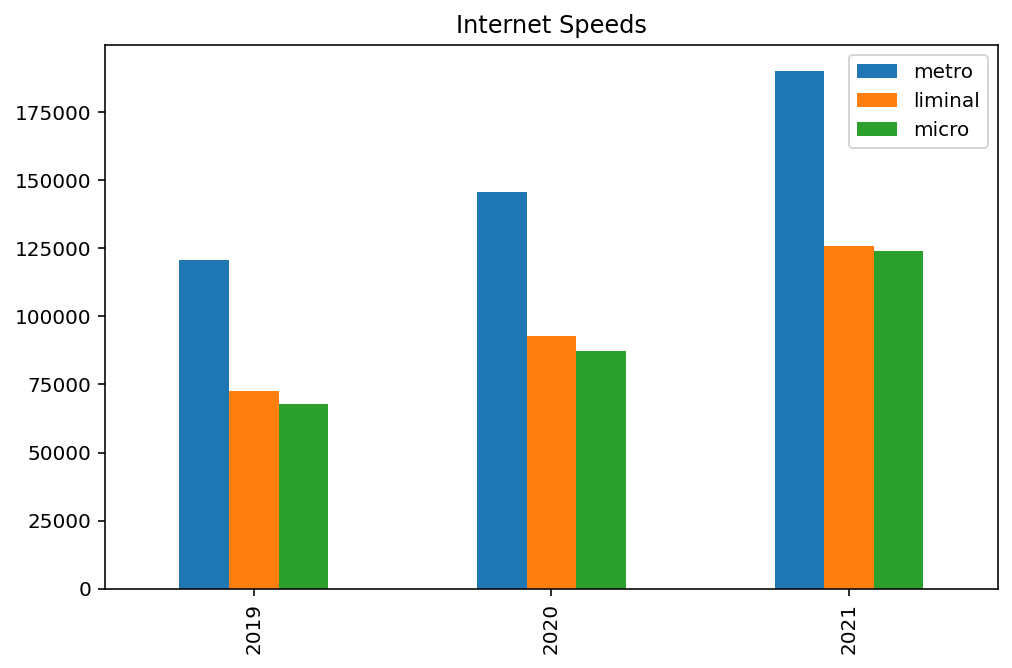

In [9]:
df = pd.DataFrame()
df.loc[2019, 'metro']   = df19[metro]['avg_d_kbps'].mean()
df.loc[2019, 'liminal'] = df19[liminal]['avg_d_kbps'].mean()
df.loc[2019, 'micro']   = df19[notLim]['avg_d_kbps'].mean()
df.loc[2020, 'metro']   = df20[metro]['avg_d_kbps'].mean()
df.loc[2020, 'liminal'] = df20[liminal]['avg_d_kbps'].mean()
df.loc[2020, 'micro']   = df20[notLim]['avg_d_kbps'].mean()
df.loc[2021, 'metro']   = df21[metro]['avg_d_kbps'].mean()
df.loc[2021, 'liminal'] = df21[liminal]['avg_d_kbps'].mean()
df.loc[2021, 'micro']   = df21[notLim]['avg_d_kbps'].mean()
df.plot(kind='bar', figsize=(8, 5))
plt.title("Internet Speeds");